In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import rasterio 
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
archangelskiy = pd.read_csv('points_gps/arch_crc.csv', encoding=  'ANSI', sep = ';')
archangelskiy['region'] = 'Архангельский'
archangelskiy['вес'] =archangelskiy['вес'] - archangelskiy['тара']
kursk = pd.read_csv('points_gps/kursk_crc.csv',encoding=  'ANSI', sep = ';')
kursk['region'] = 'Курск'
kursk['вес'] =kursk['вес'] - kursk['тара ']

CRC_DF = kursk[['точка',"вес", "%", "region"]].append(archangelskiy[['точка',"вес", "%", "region"]])

In [31]:
CRC_DF = CRC_DF.groupby(['region', 'точка']).mean().reset_index()

,region,точка,вес,%
0,Архангельский,525,53.50,62.50
1,Архангельский,526,103.75,81.25
2,Архангельский,527,81.25,68.75
3,Архангельский,528,60.00,68.75
4,Архангельский,586,156.00,96.75
5,Архангельский,587,97.25,43.75
6,Архангельский,588,68.50,33.75
7,Курск,40,78.00,90.00
8,Курск,41,100.00,90.00
9,Курск,42,115.00,80.00


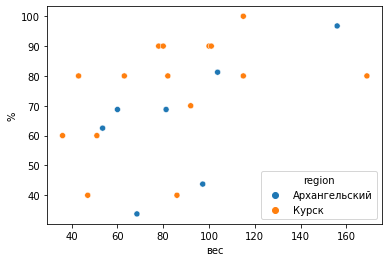

In [33]:
sns.scatterplot(data = CRC_DF , x = "вес", y = '%', hue = 'region')
CRC_DF